import libarary


In [32]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Load the data set

In [33]:
# Load dataset
data = pd.read_csv("/content/twitter_training.csv", header=None)

# Rename columns
data.columns = ["id", "topic", "sentiment", "text"]

# Show first rows
data.head()


,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


Data cleaning


In [34]:
# Remove Irrelevant sentiment
data = data[data["sentiment"] != "Irrelevant"]

# Drop missing values
data.dropna(inplace=True)

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

data["clean_text"] = data["text"].apply(clean_text)

data.head()


,id,topic,sentiment,text,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...


Encoded target label


In [35]:
# Convert sentiment to numerical form
data["sentiment"] = data["sentiment"].map({
    "Negative": 0,
    "Neutral": 1,
    "Positive": 2
})

data["sentiment"].value_counts()


,count
sentiment,
0,22358
2,20655
1,18108


Feature Extraction

In [36]:
X = data["clean_text"]
y = data["sentiment"]

vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_tfidf = vectorizer.fit_transform(X)


Test-train-split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)


Model training

In [38]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Evalution

In [39]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7565644171779141

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      4427
           1       0.71      0.69      0.70      3678
           2       0.76      0.76      0.76      4120

    accuracy                           0.76     12225
   macro avg       0.75      0.75      0.75     12225
weighted avg       0.76      0.76      0.76     12225


Confusion Matrix:
 [[3571  477  379]
 [ 546 2549  583]
 [ 424  567 3129]]


visulazation

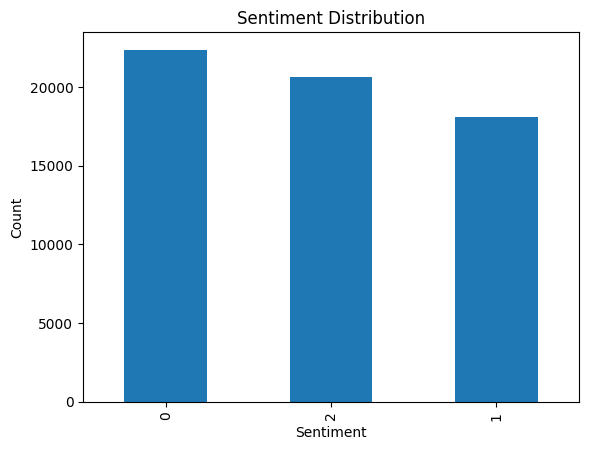

In [40]:
import matplotlib.pyplot as plt
data["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

Confusin meetrix heat map

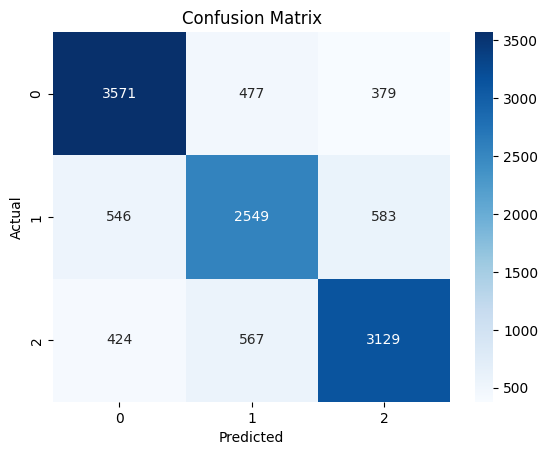

In [41]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


apply k-means

In [42]:


# Choose number of clusters (3 = Positive, Neutral, Negative)
kmeans = KMeans(n_clusters=3, random_state=42)

clusters = kmeans.fit_predict(X_tfidf)

# Add cluster labels to dataframe
data["cluster"] = clusters

data.head()


# Choose number of clusters (3 = Positive, Neutral, Negative)
kmeans = KMeans(n_clusters=3, random_state=42)

clusters = kmeans.fit_predict(X_tfidf)

# Add cluster labels to dataframe
data["cluster"] = clusters

data.head()


,id,topic,sentiment,text,clean_text,cluster
0,2401,Borderlands,2,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,1
1,2401,Borderlands,2,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,0
2,2401,Borderlands,2,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,1
3,2401,Borderlands,2,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,1
4,2401,Borderlands,2,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...,1


cluster distribution

In [43]:
data["cluster"].value_counts()


,count
cluster,
0,52252
2,5464
1,3405


reducing diamentions

In [44]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

clustering map

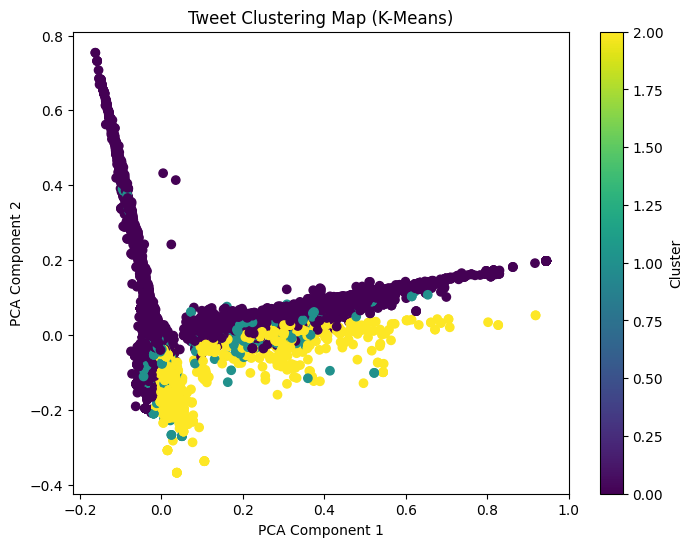

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data["cluster"], cmap="viridis")
plt.title("Tweet Clustering Map (K-Means)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

test with custom output

In [46]:
def predict_sentiment(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    prediction = model.predict(vector)[0]

    if prediction == 0:
        return "Negative"
    elif prediction == 1:
        return "Neutral"
    else:
        return "Positive"

# Example
predict_sentiment("I really love this product, it's amazing!")


'Positive'